# Outline

# Import libraries and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, Binarizer
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, VotingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

from lightgbm import LGBMClassifier, plot_importance

import graphviz

In [2]:
# Unzip archive
!unzip -o archive.zip

Archive:  archive.zip
  inflating: HousingPrices-Amsterdam-August-2021.csv  


In [3]:
# Load data
house = pd.read_csv('HousingPrices-Amsterdam-August-2021.csv')
house

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...,...,...,...
919,920,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173
920,921,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587
921,922,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256
922,923,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268


# Data Preprocessing

## Dataset Overview
|  Column |              Comment              |
|:-------:|:---------------------------------:|
| Address | Residential address               |
|   Zip   | Residential Zip code              |
|  Price  | Residential price in Euros        |
|   Area  | Residential area in square meters |
|   Room  | Number of rooms at residence      |
|   Lon   | Longitude coordinate              |
|   Lat   | Latitude coordinates.             |

## Process Missing Values

In [4]:
# Check whether 'house' contains any Null or NaN
house.isnull().sum()

Unnamed: 0    0
Address       0
Zip           0
Price         4
Area          0
Room          0
Lon           0
Lat           0
dtype: int64

In [5]:
# Fill missing value with median
house.fillna(house.median(), inplace=True)
house

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...,...,...,...
919,920,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173
920,921,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587
921,922,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256
922,923,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268


In [6]:
# Check Dtype of 'house'
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  924 non-null    int64  
 1   Address     924 non-null    object 
 2   Zip         924 non-null    object 
 3   Price       924 non-null    float64
 4   Area        924 non-null    int64  
 5   Room        924 non-null    int64  
 6   Lon         924 non-null    float64
 7   Lat         924 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 57.9+ KB


## Extract road names from address

In [7]:
# Extract road names
house['Road'] = house['Address'].str.split(',', expand=True)[0]
house['Road'] = house['Road'].str.split(' ')
house['Road_Extract'] = pd.Series()

for i in range(0, len(house), 1):
    lst = house.iloc[i, 8]
    lst_extract = [j for j in lst if j.isalpha()]
    lst_extract = ''.join(lst_extract)
    house.iloc[i, 9] = lst_extract

house

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat,Road,Road_Extract
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157,"[Blasiusstraat, 8, 2]",Blasiusstraat
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586,"[Kromme, Leimuidenstraat, 13, H]",KrommeLeimuidenstraatH
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782,"[Zaaiersweg, 11, A]",ZaaierswegA
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712,"[Tenerifestraat, 40]",Tenerifestraat
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538,"[Winterjanpad, 21]",Winterjanpad
...,...,...,...,...,...,...,...,...,...,...
919,920,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173,[Ringdijk],Ringdijk
920,921,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587,"[Kleine, Beerstraat, 31]",KleineBeerstraat
921,922,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256,"[Stuyvesantstraat, 33, II]",StuyvesantstraatII
922,923,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268,"[John, Blankensteinstraat, 51]",JohnBlankensteinstraat


In [8]:
# Compare which columns has the least unique values.
columns_names = ['Address', 'Zip', 'Road_Extract']

for name in columns_names:
    print("Length of {0}: {1}".format(name, len(house[name].unique())))

Length of Address: 919
Length of Zip: 834
Length of Road_Extract: 759


### **Comment**
Preprocessed column has the least length.  
A variety sorts can cause overfitting on prediction.  
Therefore, choosing for the least one can be efficient way.

In [9]:
# Drop unnecessary columns
house.drop(['Unnamed: 0', 'Address', 'Zip', 'Road'], axis=1, inplace=True)
house.rename(columns={'Road_Extract':'Road'}, inplace=True)
house.reset_index(drop=True, inplace=True)
house = house[['Road', 'Area', 'Room', 'Lat', 'Lon', 'Price']]
house

,Road,Area,Room,Lat,Lon,Price
0,Blasiusstraat,64,3,52.356157,4.907736,685000.0
1,KrommeLeimuidenstraatH,60,3,52.348586,4.850476,475000.0
2,ZaaierswegA,109,4,52.343782,4.944774,850000.0
3,Tenerifestraat,128,6,52.343712,4.789928,580000.0
4,Winterjanpad,138,5,52.410538,4.902503,720000.0
...,...,...,...,...,...,...
919,Ringdijk,117,1,52.354173,4.927757,750000.0
920,KleineBeerstraat,72,3,52.414587,4.890612,350000.0
921,StuyvesantstraatII,51,3,52.363256,4.856935,350000.0
922,JohnBlankensteinstraat,113,4,52.375268,4.965731,599000.0


## Check Distribution

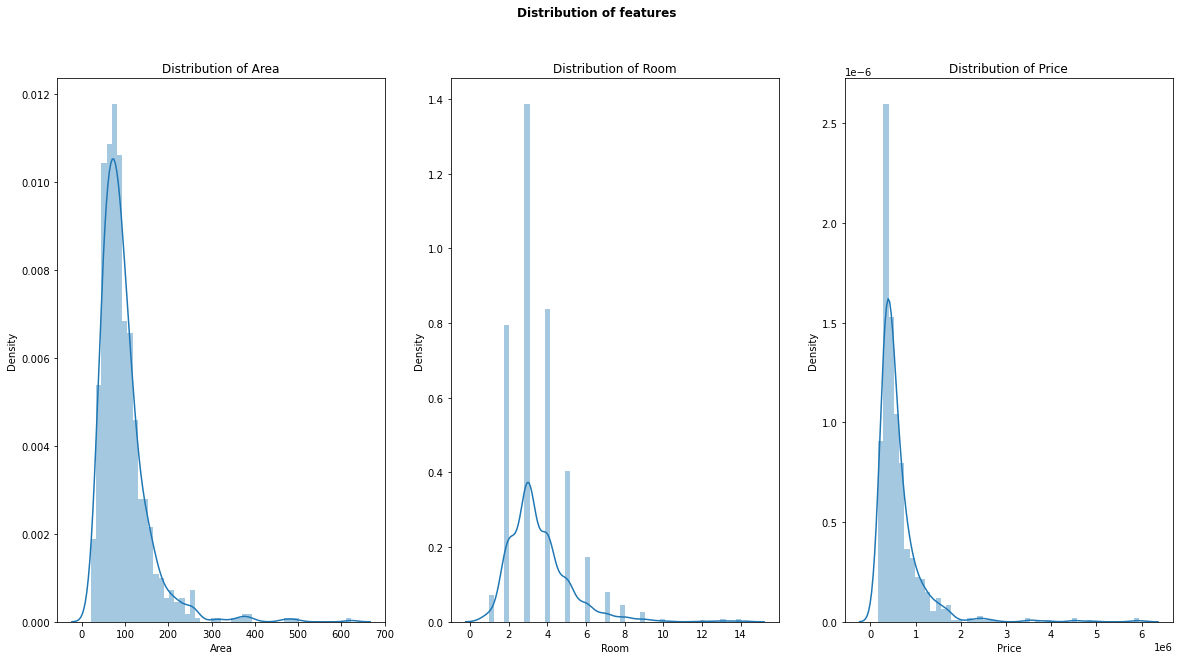

In [10]:
# Check distribution of Area, Room and Price
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))

sns.distplot(house['Area'], ax=ax1)
ax1.set_title('Distribution of Area')
sns.distplot(house['Room'], ax=ax2)
ax2.set_title('Distribution of Room')
sns.distplot(house['Price'], ax=ax3)
ax3.set_title('Distribution of Price')

plt.suptitle('Distribution of features', fontweight='bold')
plt.tight_layout
plt.show()

### **Comment**
Overall, as you can see, most of features have biased values  
So, if we process Standard Scaling, we can have better results.  
100 square meters, 3 rooms were the heighest in each feature: Area, Room

# Create Datasets

In [11]:
# Apply Standard Scaling
area_scaler = StandardScaler()
room_scaler = StandardScaler()

area_n = area_scaler.fit_transform(house['Area'].values.reshape(-1, 1))
room_n = room_scaler.fit_transform(house['Room'].values.reshape(-1, 1))

house.insert(3, 'Area_Scaled', area_n)
house.insert(4, 'Room_Scaled', room_n)

house

,Road,Area,Room,Area_Scaled,Room_Scaled,Lat,Lon,Price
0,Blasiusstraat,64,3,-0.556503,-0.359057,52.356157,4.907736,685000.0
1,KrommeLeimuidenstraatH,60,3,-0.626170,-0.359057,52.348586,4.850476,475000.0
2,ZaaierswegA,109,4,0.227246,0.269293,52.343782,4.944774,850000.0
3,Tenerifestraat,128,6,0.558162,1.525993,52.343712,4.789928,580000.0
4,Winterjanpad,138,5,0.732328,0.897643,52.410538,4.902503,720000.0
...,...,...,...,...,...,...,...,...
919,Ringdijk,117,1,0.366579,-1.615757,52.354173,4.927757,750000.0
920,KleineBeerstraat,72,3,-0.417170,-0.359057,52.414587,4.890612,350000.0
921,StuyvesantstraatII,51,3,-0.782920,-0.359057,52.363256,4.856935,350000.0
922,JohnBlankensteinstraat,113,4,0.296912,0.269293,52.375268,4.965731,599000.0


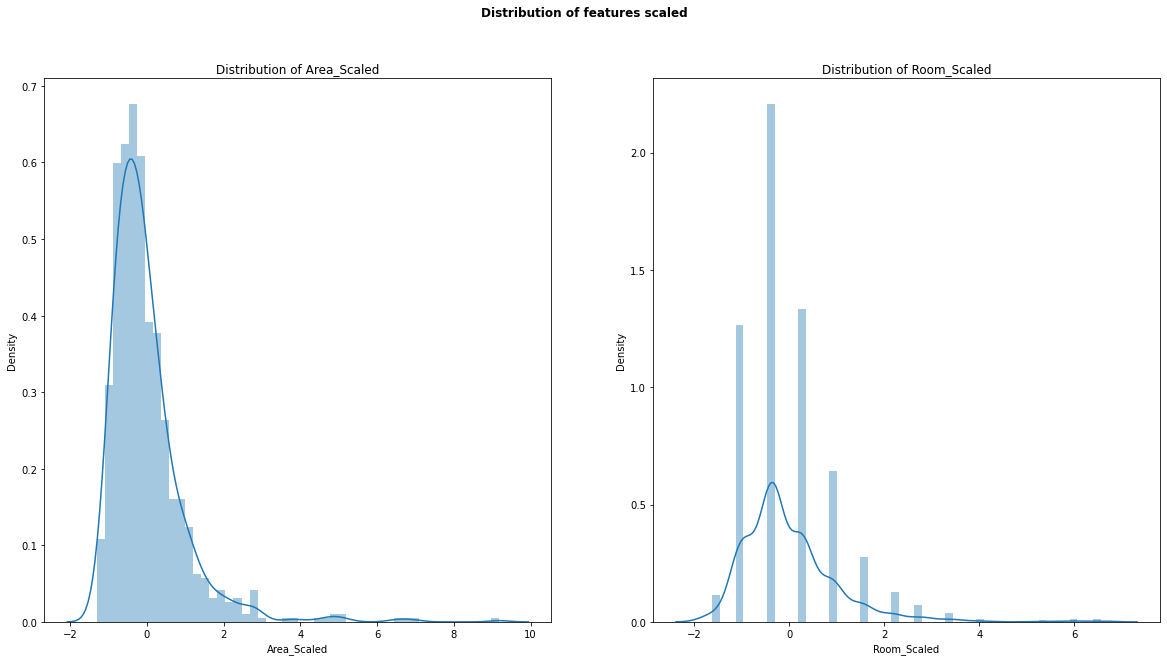

In [12]:
# Check distribution of Area_Scaled, Room_Scaled
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

sns.distplot(house['Area_Scaled'], ax=ax1)
ax1.set_title('Distribution of Area_Scaled')
sns.distplot(house['Room_Scaled'], ax=ax2)
ax2.set_title('Distribution of Room_Scaled')

plt.suptitle('Distribution of features scaled', fontweight='bold')
plt.tight_layout
plt.show()

In [13]:
# Standard Scaling doesn't work
# Maybe conerting into log1p can be another good idea.

area_n = np.log1p(house['Area'])
room_n = np.log1p(house['Room'])

house.insert(5, 'Area_Log', area_n)
house.insert(6, 'Room_Log', room_n)

house

,Road,Area,Room,Area_Scaled,Room_Scaled,Area_Log,Room_Log,Lat,Lon,Price
0,Blasiusstraat,64,3,-0.556503,-0.359057,4.174387,1.386294,52.356157,4.907736,685000.0
1,KrommeLeimuidenstraatH,60,3,-0.626170,-0.359057,4.110874,1.386294,52.348586,4.850476,475000.0
2,ZaaierswegA,109,4,0.227246,0.269293,4.700480,1.609438,52.343782,4.944774,850000.0
3,Tenerifestraat,128,6,0.558162,1.525993,4.859812,1.945910,52.343712,4.789928,580000.0
4,Winterjanpad,138,5,0.732328,0.897643,4.934474,1.791759,52.410538,4.902503,720000.0
...,...,...,...,...,...,...,...,...,...,...
919,Ringdijk,117,1,0.366579,-1.615757,4.770685,0.693147,52.354173,4.927757,750000.0
920,KleineBeerstraat,72,3,-0.417170,-0.359057,4.290459,1.386294,52.414587,4.890612,350000.0
921,StuyvesantstraatII,51,3,-0.782920,-0.359057,3.951244,1.386294,52.363256,4.856935,350000.0
922,JohnBlankensteinstraat,113,4,0.296912,0.269293,4.736198,1.609438,52.375268,4.965731,599000.0


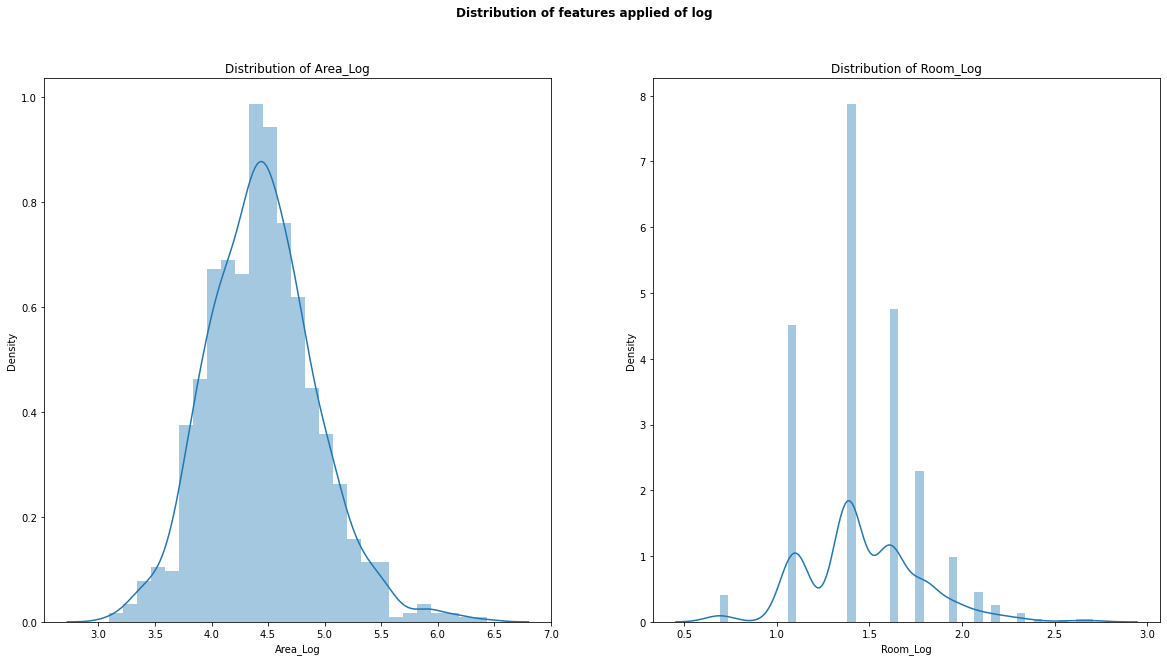

In [14]:
# Check distribution of Area_Log, Room_Log
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

sns.distplot(house['Area_Log'], ax=ax1)
ax1.set_title('Distribution of Area_Log')
sns.distplot(house['Room_Log'], ax=ax2)
ax2.set_title('Distribution of Room_Log')

plt.suptitle('Distribution of features applied of log', fontweight='bold')
plt.tight_layout
plt.show()

### **Comment**
We plotted each distribution of original, Standard Scaled and Log Scaled.  
At the last plot, we could see better distribution which scaler was Log (similar to Normal Distribution).

In [15]:
# Extract needed features for training
house_train = house[['Road', 'Area_Log', 'Room_Log', 'Price', 'Lat', 'Lon']]
house_train

,Road,Area_Log,Room_Log,Price,Lat,Lon
0,Blasiusstraat,4.174387,1.386294,685000.0,52.356157,4.907736
1,KrommeLeimuidenstraatH,4.110874,1.386294,475000.0,52.348586,4.850476
2,ZaaierswegA,4.700480,1.609438,850000.0,52.343782,4.944774
3,Tenerifestraat,4.859812,1.945910,580000.0,52.343712,4.789928
4,Winterjanpad,4.934474,1.791759,720000.0,52.410538,4.902503
...,...,...,...,...,...,...
919,Ringdijk,4.770685,0.693147,750000.0,52.354173,4.927757
920,KleineBeerstraat,4.290459,1.386294,350000.0,52.414587,4.890612
921,StuyvesantstraatII,3.951244,1.386294,350000.0,52.363256,4.856935
922,JohnBlankensteinstraat,4.736198,1.609438,599000.0,52.375268,4.965731


In [16]:
# Process One-Hot Encoding
house_train = pd.get_dummies(house_train)
house_train

,Area_Log,Room_Log,Price,Lat,Lon,Road_,Road_A,Road_Aalbersestraat,Road_Aalsmeerweg,Road_AalsmeerwegII,...,Road_Zuideinde,Road_ZuideindeD,Road_ZuidelijkeWandelweg,Road_ZuidelijkeWandelwegPP,Road_Zwanenplein,Road_denUylstraat,Road_vanAalststraatPP,Road_vanEpenstraat,Road_vanOssstraat,Road_vanRiemsdijkweg
0,4.174387,1.386294,685000.0,52.356157,4.907736,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.110874,1.386294,475000.0,52.348586,4.850476,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.700480,1.609438,850000.0,52.343782,4.944774,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.859812,1.945910,580000.0,52.343712,4.789928,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.934474,1.791759,720000.0,52.410538,4.902503,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,4.770685,0.693147,750000.0,52.354173,4.927757,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
920,4.290459,1.386294,350000.0,52.414587,4.890612,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
921,3.951244,1.386294,350000.0,52.363256,4.856935,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
922,4.736198,1.609438,599000.0,52.375268,4.965731,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Set feature and label dataset as X, y
X = house_train.drop('Price', axis=1, inplace=False)
y = house_train['Price']

print('Shape of X: ', X.shape)
print('Shape of y: ', y.shape)

Shape of X:  (924, 763)
Shape of y:  (924,)


In [18]:
# Split X, y into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

print('Shape of X_train: ', X_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (739, 763)
Shape of X_test:  (185, 763)
Shape of y_train:  (739,)
Shape of y_test:  (185,)


# Regression

## Logistic Regression

In [19]:
# Logistic Regression is one of the most fundamental estimator.
# So, let's try with Logistic Regression, first.

lr_reg = LogisticRegression()
lr_reg.fit(X_train, y_train)
lr_preds = lr_reg.predict(X_test)

lr_mse = mean_squared_error(y_test, lr_preds)
lr_rmse = np.sqrt(lr_mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(lr_mse, lr_mse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, lr_preds)))

MSE : 299267182486.487, RMSE : 299267182486.487
Variance score : 0.232


## Ridge

In [20]:
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X, y, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

In [22]:
print('Individual Negative MSE scores of cross validation 5 times: ', np.round(neg_mse_scores, 2))
print('Individual RMSE scores of cross validation 5 times: ', np.round(rmse_scores, 2))
print('Average of RMSE scores of cross validation 5 times : {0:.3f} '.format(avg_rmse))

Individual Negative MSE scores of cross validation 5 times:  [-1.87920716e+11 -3.75597847e+11 -5.12079039e+10 -5.66465647e+10
 -1.38362274e+11]
Individual RMSE scores of cross validation 5 times:  [433498.23 612860.38 226291.63 238005.39 371970.8 ]
Average of RMSE scores of cross validation 5 times : 376525.286 


# Report
**Summary**  
* Features of datasets are few for training
* If I had more various features, I could have made better results.

**Comment**  
1. I tried to reduce the number of unique values of 'Address' (919 --> 759)
- Length of Address: 919
- Length of Zip: 834
- Length of Road_Extract: 759

2. I also tried to make features more scaled as much as Normal Distribution by comapring 3 methods.
3. I made Ridge model to regularize features.  
Comapring with Logistic Regression, the RMSE score was decreased from 299267182486.487 to 376525.286.  
Still, the evaulation score of my models are low. I need to improve them.